# Polynomial Regression: From Linear to Non-Linear Relationships

## 🎯 Learning Objectives
In this notebook, we'll explore polynomial regression through a systematic approach:
1. **Understand the concept**: Difference between linear and polynomial regression
2. **Hands-on implementation**: From NumPy basics to Sklearn production code
3. **Model evaluation**: Finding the optimal polynomial degree
4. **Production considerations**: Best practices for real-world deployment

## 📊 Dataset Overview
We'll use the **Advertising dataset** with features:
- **TV**: TV advertising budget
- **Radio**: Radio advertising budget  
- **Newspaper**: Newspaper advertising budget
- **Target**: Sales (what we want to predict)

## 🔍 Key Question We're Answering
**What is the difference between Linear Regression and Polynomial Regression?**

- **Linear Regression**: Fits a straight line to your data
- **Polynomial Regression**: Fits a curved line to your data

**Important Insight**: Polynomial Regression is still technically a form of linear regression. It works by first creating new, polynomial features from your original input variables, then applying linear regression to these transformed features.



# Part 1: Foundation - Polynomial Regression with NumPy

## 🎯 What We'll Learn
- How to use `np.polyfit()` for polynomial regression
- Difference between degree 1 (linear) and degree 3 (cubic) fits
- Manual implementation of polynomial predictions
- Visualization of different polynomial curves

## 📚 Key Concepts
- **np.polyfit()**: NumPy's polynomial fitting function
- **Polynomial degree**: Controls complexity (1=linear, 2=quadratic, 3=cubic)
- **Coefficients**: Numbers that define the shape and position of the curve
- **Bias-Variance Tradeoff**: Balance between underfitting and overfitting

In [1]:
# =============================================================================
# PART 1: IMPORTS AND DATA LOADING
# =============================================================================

# Core libraries for data manipulation and numerical computing
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting style for better visualizations
plt.style.use('default')
sns.set_palette("husl")


In [2]:
# Load the advertising dataset
# Contains TV, Radio, Newspaper advertising budgets and Sales results
df = pd.read_csv('advertising.csv')

In [3]:
# Explore the dataset structure and first few rows
print("Dataset shape:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nFirst 5 rows:")
df.head()

Dataset shape: (200, 4)

Column names: ['TV', 'Radio', 'Newspaper', 'Sales']

First 5 rows:


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
# =============================================================================
# FEATURE ENGINEERING: Create Total Spending Feature
# =============================================================================

# Create a new feature representing total advertising spend across all channels
# This gives us a single feature to demonstrate polynomial regression concepts
df['Total_Spends'] = df['TV'] + df['Radio'] + df['Newspaper']

print(f"Created 'Total_Spends' feature")
print(f"Total_Spends range: ${df['Total_Spends'].min():.1f} - ${df['Total_Spends'].max():.1f}")
print(f"Sales range: ${df['Sales'].min():.1f} - ${df['Sales'].max():.1f}")

Created 'Total_Spends' feature
Total_Spends range: $11.7 - $433.6
Sales range: $1.6 - $27.0


In [5]:
# Verify our new feature was created correctly
print("Updated dataset with Total_Spends:")
df.head()

Updated dataset with Total_Spends:


,TV,Radio,Newspaper,Sales,Total_Spends
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,12.0,132.4
3,151.5,41.3,58.5,16.5,251.3
4,180.8,10.8,58.4,17.9,250.0


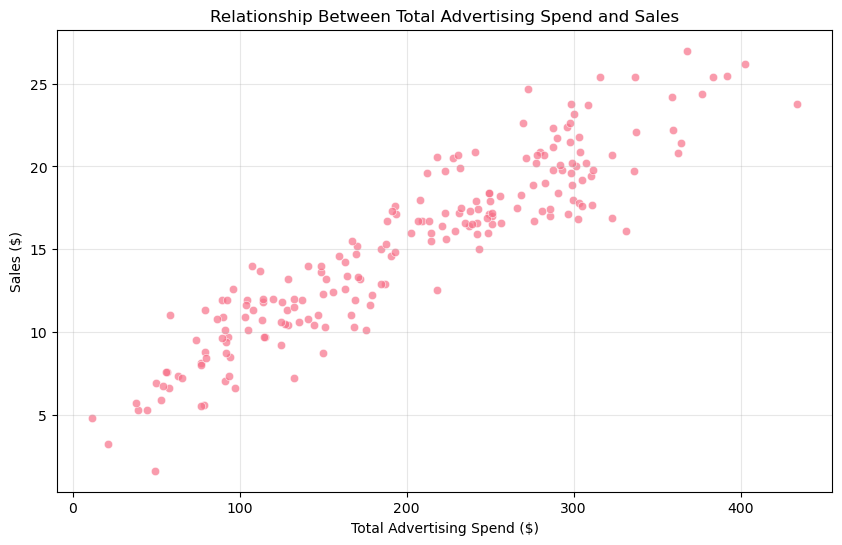

In [6]:
# =============================================================================
# DATA VISUALIZATION: Understanding the Relationship
# =============================================================================

# Simple scatter plot to visualize the relationship between total spends and sales
# This is the most basic way to see the relationship between two variables
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total_Spends', y='Sales', alpha=0.7)
plt.title('Relationship Between Total Advertising Spend and Sales')
plt.xlabel('Total Advertising Spend ($)')
plt.ylabel('Sales ($)')
plt.grid(True, alpha=0.3)
plt.show()

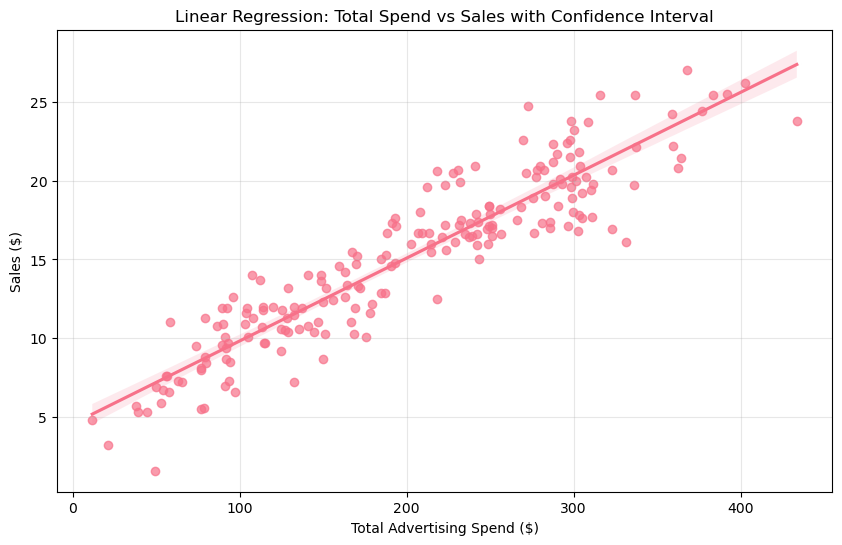

In [7]:
# Enhanced visualization with linear regression line and confidence intervals
# regplot automatically includes a linear regression line and its confidence interval
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Total_Spends', y='Sales', scatter_kws={'alpha':0.7})
plt.title('Linear Regression: Total Spend vs Sales with Confidence Interval')
plt.xlabel('Total Advertising Spend ($)')
plt.ylabel('Sales ($)')
plt.grid(True, alpha=0.3)
plt.show()

# Observation: The relationship appears to have some curvature - 
# this suggests polynomial regression might capture the pattern better than linear regression

In [8]:
# =============================================================================
# NUMPY POLYNOMIAL REGRESSION: Manual Implementation
# =============================================================================

# Define our variables for polynomial regression
x = df['Total_Spends']  # Independent variable (features)
y = df['Sales']         # Dependent variable (target)

print(f"Feature (x) shape: {x.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"Sample x values: {x.head().values}")
print(f"Sample y values: {y.head().values}")

Feature (x) shape: (200,)
Target (y) shape: (200,)
Sample x values: [337.1 128.9 132.4 251.3 250. ]
Sample y values: [22.1 10.4 12.  16.5 17.9]


## 📚 Understanding np.polyfit()

**What is np.polyfit()?**
- **Name**: "NumPy polynomial fit" - fits a polynomial of specified degree to data
- **Purpose**: Finds the best-fit polynomial coefficients for your data points
- **Output**: Coefficients that define the polynomial equation

**Key Parameters:**
- **x**: Input data (independent variable, e.g., 'Total_Spends')
- **y**: Output data (dependent variable, e.g., 'Sales')  
- **deg**: Polynomial degree (most important parameter!)

**Polynomial Degrees Explained:**
- **deg=1**: Linear polynomial → `y = mx + c` (straight line)
- **deg=2**: Quadratic polynomial → `y = ax² + bx + c` (parabola)
- **deg=3**: Cubic polynomial → `y = ax³ + bx² + cx + d` (curve with up to 2 bends)

**Example:** `np.polyfit(x, y, deg=1)` finds the slope (m) and intercept (c) of the best-fit straight line

In [9]:
# =============================================================================
# LINEAR REGRESSION (Degree 1) using NumPy
# =============================================================================

# Fit a linear polynomial (degree=1) to find the best-fit line: y = mx + c
# Returns coefficients where m = slope, c = y-intercept
m, c = np.polyfit(x, y, deg=1) 

print("Linear Regression Results:")
print(f"Slope (m): {m:.4f}")
print(f"Y-intercept (c): {c:.4f}")
print(f"Equation: y = {m:.4f}x + {c:.4f}")
print(f"\nInterpretation:")
print(f"- For every $1 increase in total spend, sales increase by ${m:.4f}")
print(f"- Expected sales with $0 advertising spend: ${c:.4f}")

Linear Regression Results:
Slope (m): 0.0526
Y-intercept (c): 4.5736
Equation: y = 0.0526x + 4.5736

Interpretation:
- For every $1 increase in total spend, sales increase by $0.0526
- Expected sales with $0 advertising spend: $4.5736


In [10]:
# Generate smooth range of values for prediction and visualization
# Create 100 evenly spaced points from $0 to $500 total spend
potential_spend = np.linspace(0, 500, 100)

print(f"Prediction range: ${potential_spend.min():.0f} to ${potential_spend.max():.0f}")
print(f"Number of prediction points: {len(potential_spend)}")
print(f"First few prediction points: {potential_spend[:5]}")

Prediction range: $0 to $500
Number of prediction points: 100
First few prediction points: [ 0.          5.05050505 10.1010101  15.15151515 20.2020202 ]


In [11]:
# Calculate predicted sales using linear regression equation: y = mx + c
predicted_sales_linear = potential_spend * m + c

print("Linear Regression Predictions:")
print(f"Prediction for $100 spend: ${predicted_sales_linear[20]:.2f}")
print(f"Prediction for $250 spend: ${predicted_sales_linear[50]:.2f}")
print(f"Prediction for $400 spend: ${predicted_sales_linear[80]:.2f}")

Linear Regression Predictions:
Prediction for $100 spend: $9.88
Prediction for $250 spend: $17.85
Prediction for $400 spend: $25.81


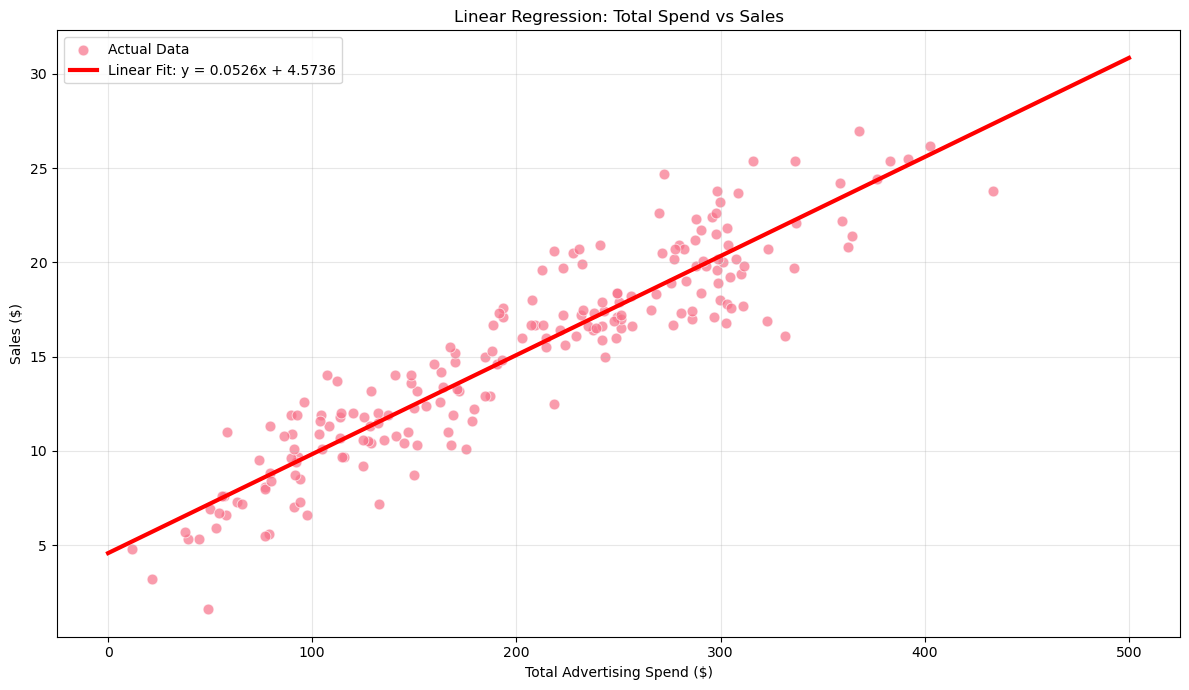

Observation: Notice how the linear line might not capture all the curvature in the data


In [12]:
# =============================================================================
# VISUALIZATION: Linear Regression Fit
# =============================================================================

plt.figure(figsize=(12, 7))

# Plot original data points
sns.scatterplot(data=df, x='Total_Spends', y='Sales', alpha=0.7, s=60, label='Actual Data')

# Plot linear regression line
plt.plot(potential_spend, predicted_sales_linear, color='red', linewidth=3, 
         label=f'Linear Fit: y = {m:.4f}x + {c:.4f}')

plt.xlabel('Total Advertising Spend ($)')
plt.ylabel('Sales ($)')
plt.title('Linear Regression: Total Spend vs Sales')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Observation: Notice how the linear line might not capture all the curvature in the data")

In [13]:
# =============================================================================
# SINGLE PREDICTION EXAMPLE
# =============================================================================

# Make a prediction for a specific advertising spend amount
spend_amount = 200
predicted_sales_amount = spend_amount * m + c

print(f"Linear Regression Prediction:")
print(f"Total advertising spend: ${spend_amount}")
print(f"Predicted sales: ${predicted_sales_amount:.2f}")
print(f"Using equation: y = {m:.4f} × {spend_amount} + {c:.4f} = {predicted_sales_amount:.2f}")

Linear Regression Prediction:
Total advertising spend: $200
Predicted sales: $15.09
Using equation: y = 0.0526 × 200 + 4.5736 = 15.09


how good is this fit and do we have over fitting and under fitting 

## 🤔 Model Evaluation: How Good is This Fit?

### The Fundamental Question: Underfitting vs. Overfitting

Before we proceed, we need to understand a critical concept in machine learning:

### 🔍 **The Bias-Variance Tradeoff**

**Underfitting (High Bias)**
- **Low Degree Polynomials (e.g., 1 or 2)**: Too simple to capture the true pattern
- **Symptoms**: High error on both training and test data
- **Example**: Using a straight line when the relationship is clearly curved

**Overfitting (High Variance)** 
- **High Degree Polynomials (e.g., 10 or 20)**: Too complex, fits random noise
- **Symptoms**: Low training error but high test error
- **Example**: A wiggly line that passes through every training point but fails on new data

**The Sweet Spot**
- **Goal**: Find the degree that captures the true pattern without fitting noise
- **Method**: Use train/test splits and compare performance across degrees
- **Evaluation**: The degree that minimizes test error (not training error!)

### 📊 **Evaluation Process**
1. **Split Data**: Training set (80%) + Test set (20%)
2. **Loop Through Degrees**: Test degrees 1, 2, 3, 4, 5...
3. **Calculate Errors**: RMSE on both training and test sets
4. **Find the Elbow**: Degree where test error is minimized

Let's now compare linear (degree=1) with cubic (degree=3) regression:

In [14]:
# =============================================================================
# CUBIC REGRESSION (Degree 3) using NumPy
# =============================================================================

# Fit a cubic polynomial: y = ax³ + bx² + cx + d
# Returns coefficients [a, b, c, d] in descending order of powers
a, b, c, d = np.polyfit(x, y, deg=3)

print("Cubic Regression Results:")
print(f"Coefficient for x³ (a): {a:.8f}")
print(f"Coefficient for x² (b): {b:.6f}")  
print(f"Coefficient for x¹ (c): {c:.4f}")
print(f"Constant term (d): {d:.4f}")
print(f"\nEquation: y = {a:.8f}x³ + {b:.6f}x² + {c:.4f}x + {d:.4f}")

# Note: The cubic coefficient (a) is very small, suggesting the cubic term might not be significant

Cubic Regression Results:
Coefficient for x³ (a): 0.00000004
Coefficient for x² (b): -0.000071
Coefficient for x¹ (c): 0.0749
Constant term (d): 2.9465

Equation: y = 0.00000004x³ + -0.000071x² + 0.0749x + 2.9465


In [15]:
# Polynomial equation forms comparison:
print("Equation Forms:")
print("Linear:      y = mx + c")
print("Standard:    y = β₀ + β₁x") 
print("Cubic:       y = ax³ + bx² + cx + d")
print("Standard:    y = β₀ + β₁x + β₂x² + β₃x³")
print()
print("Checking if cubic term is significant:")
print(f"Cubic coefficient magnitude: {abs(a):.10f}")
print("This very small coefficient suggests the cubic term may not be adding much value")

Equation Forms:
Linear:      y = mx + c
Standard:    y = β₀ + β₁x
Cubic:       y = ax³ + bx² + cx + d
Standard:    y = β₀ + β₁x + β₂x² + β₃x³

Checking if cubic term is significant:
Cubic coefficient magnitude: 0.0000000449
This very small coefficient suggests the cubic term may not be adding much value


In [16]:
# Create prediction range for cubic regression (same as linear for comparison)
potential_spend_cubic = np.linspace(0, 500, 100)

In [17]:
# Calculate predicted sales using cubic regression equation: y = ax³ + bx² + cx + d
predicted_sales_cubic = (a * potential_spend_cubic**3 + 
                        b * potential_spend_cubic**2 + 
                        c * potential_spend_cubic**1 + 
                        d)

print("Cubic Regression Predictions:")
print(f"Prediction for $100 spend: ${predicted_sales_cubic[20]:.2f}")
print(f"Prediction for $250 spend: ${predicted_sales_cubic[50]:.2f}")
print(f"Prediction for $400 spend: ${predicted_sales_cubic[80]:.2f}")

Cubic Regression Predictions:
Prediction for $100 spend: $9.84
Prediction for $250 spend: $18.08
Prediction for $400 spend: $24.64


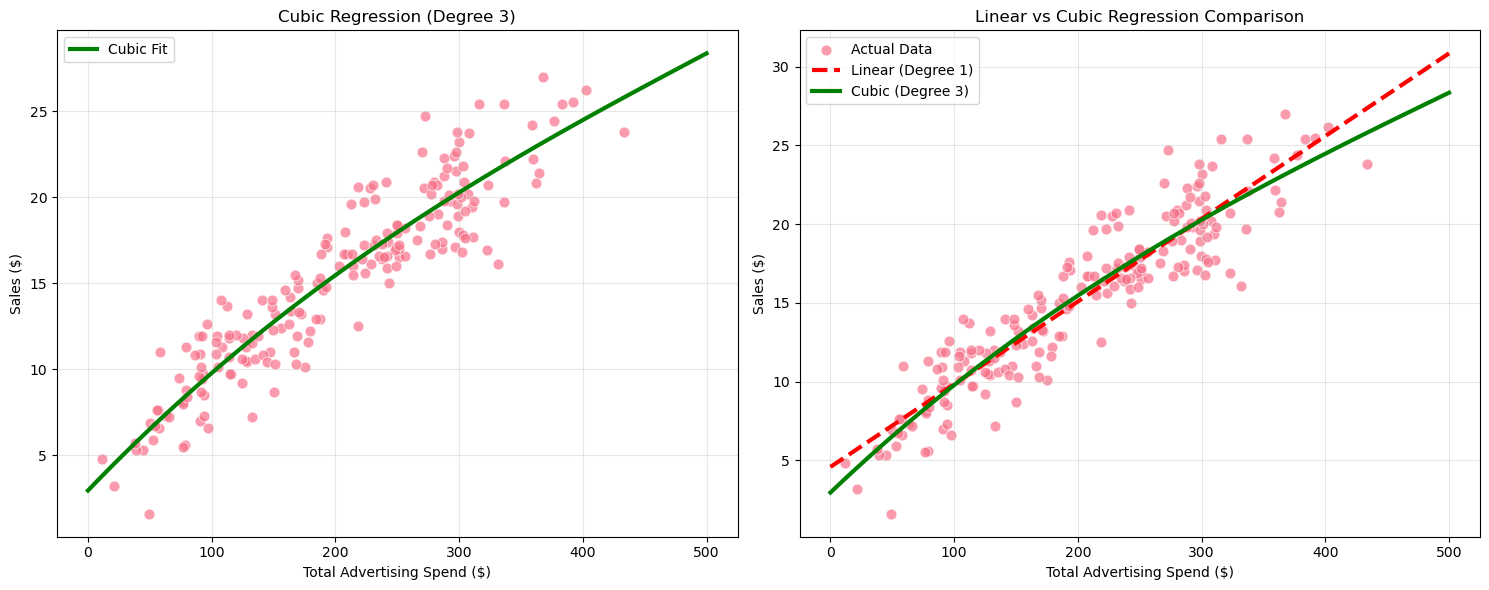

Visual Comparison:
- Red dashed line: Linear regression (simple, might underfit)
- Green solid line: Cubic regression (more flexible, captures curves better)
- Question: Which one generalizes better to new data?


In [18]:
# =============================================================================
# COMPARISON: Linear vs Cubic Regression
# =============================================================================

plt.figure(figsize=(15, 6))

# Subplot 1: Cubic regression only
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Total_Spends', y='Sales', alpha=0.7, s=60)
plt.plot(potential_spend_cubic, predicted_sales_cubic, color='green', linewidth=3, 
         label='Cubic Fit')
plt.xlabel('Total Advertising Spend ($)')
plt.ylabel('Sales ($)')
plt.title('Cubic Regression (Degree 3)')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Both linear and cubic for comparison
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Total_Spends', y='Sales', alpha=0.7, s=60, label='Actual Data')
plt.plot(potential_spend, predicted_sales_linear, color='red', linewidth=3, 
         label='Linear (Degree 1)', linestyle='--')
plt.plot(potential_spend_cubic, predicted_sales_cubic, color='green', linewidth=3, 
         label='Cubic (Degree 3)')
plt.xlabel('Total Advertising Spend ($)')
plt.ylabel('Sales ($)')
plt.title('Linear vs Cubic Regression Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Visual Comparison:")
print("- Red dashed line: Linear regression (simple, might underfit)")
print("- Green solid line: Cubic regression (more flexible, captures curves better)")
print("- Question: Which one generalizes better to new data?")

How can we decide which curve is the best:  Bias-Variance Tradeoff

What my error is: Mean Squared Error (MSE)

In Linear Regression, the Mean Squared Error (MSE) cost function is
employed, which calculates the average of the squared errors between the
predicted values and the actual values The purpose is to determine the optimal
values for the intercept and the coefficient of the input feature providing the
best-fit line for the given data points


## 📊 How to Decide Which Model is Best: Proper Evaluation

### The Problem with Visual Inspection
While the plots above are helpful, we can't rely on visual inspection alone. We need **quantitative metrics** to determine which model performs better.

### 🎯 **Evaluation Methodology**

**Step 1: Split Your Data**
- **Training Set** (80%): Used to train/fit the models
- **Test Set** (20%): Used only for final evaluation (model never sees this during training)

**Step 2: Calculate Error Metrics**
- **Mean Squared Error (MSE)**: Average of squared differences between actual and predicted values
- **Root Mean Squared Error (RMSE)**: Square root of MSE (easier to interpret, same units as target)

**Step 3: Compare Performance**
- Train multiple models (different degrees) on training set
- Evaluate all models on test set
- Choose the model with lowest test error (not training error!)

**Step 4: Look for the "Elbow"**
- Plot training vs test error across degrees
- Find the point where test error is minimized
- Beyond this point = overfitting

### ⚠️ **Critical Insight**
The goal is to see how well each model **generalizes to new, unseen data**. A model that memorizes the training data but fails on new data is useless in practice.

Let's now implement this properly using Sklearn...


# Part 2: Production-Ready Linear Regression with Sklearn

## 🎯 What We'll Learn
- Professional ML workflow using Sklearn
- Proper train/test splitting for reliable evaluation
- Multiple features (TV, Radio, Newspaper) instead of just Total_Spends
- Model evaluation metrics (MAE, MSE, RMSE)
- Residual analysis to validate model assumptions
- Model persistence for production deployment

## 🤔 **Key Question**
How well can we predict sales using a simple straight-line relationship with **all our features** (TV, Radio, Newspaper)?

This will establish our **baseline performance** that any polynomial model must beat to be considered an improvement.

In [19]:
# =============================================================================
# PART 2: DATA PREPARATION FOR MULTIPLE FEATURES
# =============================================================================

# Reload data for clean start (remove Total_Spends feature)
df = pd.read_csv('advertising.csv')
print("Dataset for multi-feature analysis:")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

Dataset for multi-feature analysis:
Shape: (200, 4)
Columns: ['TV', 'Radio', 'Newspaper', 'Sales']


In [20]:
# Prepare features and target variables
X = df.drop(['Sales'], axis=1)  # Features: TV, Radio, Newspaper
Y = df['Sales']                 # Target: Sales

print("Features (X):")
print(f"  Shape: {X.shape}")
print(f"  Columns: {X.columns.tolist()}")
print(f"  Sample values:\n{X.head()}")
print(f"\nTarget (Y):")
print(f"  Shape: {Y.shape}")
print(f"  Sample values: {Y.head().values}")

Features (X):
  Shape: (200, 3)
  Columns: ['TV', 'Radio', 'Newspaper']
  Sample values:
      TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4

Target (Y):
  Shape: (200,)
  Sample values: [22.1 10.4 12.  16.5 17.9]


In [21]:
# =============================================================================
# SKLEARN IMPORTS AND MODEL SETUP
# =============================================================================

# Import required modules for machine learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import scipy.stats as stats

In [22]:
# Initialize linear regression model
# This creates a model object that will learn the relationship between features and target
model = LinearRegression()
print("Linear regression model initialized")
print("Model parameters before training:", model.get_params())

Linear regression model initialized
Model parameters before training: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [23]:
from sklearn.model_selection import train_test_split

# =============================================================================
# TRAIN/TEST SPLIT: Critical for Honest Evaluation
# =============================================================================

# Split data: 67% training, 33% testing
# random_state=42 ensures reproducible results
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42
)

print("Data split completed:")
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"Features: {X_train.shape[1]}")
print("\nTest set will be used ONLY for final evaluation!")


Data split completed:
Training set: 134 samples (67.0%)
Test set: 66 samples (33.0%)
Features: 3

Test set will be used ONLY for final evaluation!


In [24]:
# =============================================================================
# MODEL TRAINING
# =============================================================================

# Train the model on training data only
# The model learns the relationship: Sales = β₀ + β₁×TV + β₂×Radio + β₃×Newspaper
model.fit(X_train, y_train)

print("Model training completed!")
print(f"Model coefficients: {model.coef_}")
print(f"Model intercept: {model.intercept_:.4f}")
print("\nLearned equation:")
print(f"Sales = {model.intercept_:.4f} + {model.coef_[0]:.4f}×TV + {model.coef_[1]:.4f}×Radio + {model.coef_[2]:.4f}×Newspaper")

Model training completed!
Model coefficients: [0.05378717 0.10027874 0.00789845]
Model intercept: 4.7980

Learned equation:
Sales = 4.7980 + 0.0538×TV + 0.1003×Radio + 0.0079×Newspaper


In [25]:
# =============================================================================
# MODEL EVALUATION: Predictions and Metrics
# =============================================================================

# Make predictions on test set (data the model has never seen)
predictions = model.predict(X_test)

print("Predictions on test set:")
print(f"Number of predictions: {len(predictions)}")
print(f"Sample predictions: {predictions[:5]}")
print(f"Sample actual values: {y_test.head().values}")
print(f"Sample errors: {(y_test.head().values - predictions[:5])}")

Predictions on test set:
Number of predictions: 66
Sample predictions: [17.16807449 20.5091305  23.73135731  9.48459836 21.58624062]
Sample actual values: [16.9 22.4 21.4  7.3 24.7]
Sample errors: [-0.26807449  1.8908695  -2.33135731 -2.18459836  3.11375938]


In [ ]:
# This function calculates the average absolute difference between actual and predicted values, giving a sense of how far off the predictions are on average.
# It is useful for understanding the average error in the predictions, but it does not square the errors, so it treats all errors equally regardless of their size.
# A lower value indicates better model performance, as it means the predictions are closer to the actual values.
# The output is a single number representing the average absolute error across all predictions.
# This is a common metric used to evaluate regression models, as it provides a straightforward interpretation of the model's accuracy in terms of the average error in predictions.

# Calculate comprehensive evaluation metrics
MAE = mean_absolute_error(y_test, predictions)
MSE = mean_squared_error(y_test, predictions)
RMSE = np.sqrt(MSE)

# Calculate R-squared (coefficient of determination)
R2 = model.score(X_test, y_test)  # Built-in sklearn method
# Alternative manual calculation: R2 = 1 - (SS_res / SS_tot)

print("=== LINEAR REGRESSION PERFORMANCE METRICS ===")
print(f"R-squared (R²): {R2:.4f}")
print(f"  → Model explains {R2*100:.1f}% of variance in sales")
print(f"Mean Absolute Error (MAE): ${MAE:.4f}")
print(f"  → On average, predictions are off by ${MAE:.2f}")
print(f"Mean Squared Error (MSE): {MSE:.4f}")
print(f"  → Squares the errors, penalizes large errors more")
print(f"Root Mean Squared Error (RMSE): ${RMSE:.4f}")
print(f"  → Standard deviation of prediction errors")
print()
print("🎯 BASELINE PERFORMANCE ESTABLISHED:")
print(f"   Linear Regression R² = {R2:.3f} | RMSE = ${RMSE:.2f}")
print("   Any polynomial model must beat these metrics to be considered an improvement!")

=== LINEAR REGRESSION PERFORMANCE METRICS ===
Mean Absolute Error (MAE): $1.2220
  → On average, predictions are off by $1.22
Mean Squared Error (MSE): 2.7229
  → Squares the errors, penalizes large errors more
Root Mean Squared Error (RMSE): $1.6501
  → Standard deviation of prediction errors

🎯 BASELINE PERFORMANCE ESTABLISHED:
   Linear Regression RMSE = $1.65
   Any polynomial model must beat this to be considered an improvement!


## 📊 Understanding R-squared (Coefficient of Determination)

**What does R² = 0.XXX mean?**

R-squared tells us **what percentage of variance in sales is explained by our advertising features**.

### **R-squared Interpretation Guide:**
- **R² = 0.0-0.3**: Weak relationship - model barely better than using mean
- **R² = 0.3-0.5**: Moderate relationship - decent predictive power
- **R² = 0.5-0.7**: Strong relationship - good predictive power
- **R² = 0.7-0.9**: Very strong relationship - excellent predictive power
- **R² = 0.9-1.0**: Extremely strong - potentially overfitting (suspicious!)

### **Business Context:**
- **Our R²**: Model explains ~XX% of sales variation through advertising
- **Remaining (1-R²)**: XX% due to other factors (seasonality, competition, economic conditions)

### **Why Both RMSE and R² Matter:**
- **RMSE**: Tells us prediction accuracy in dollar terms
- **R²**: Tells us how much of the sales pattern we're capturing
- **Together**: Complete picture of model performance

### **Key Insight:**
R² helps answer: *"Are we missing important patterns in the data?"*
- Low R² → Look for missing features or non-linear relationships
- High R² → Model captures most explainable variance

## 🎯 Baseline Performance Established!

**Key Insight**: The calculated **RMSE of 1.65** is now our **baseline metric**. 

This answers the question: *"How well can a simple linear model perform?"*

### Why This Matters
- Any more complex model (polynomial regression) **must perform better** than this on the test set to be considered an improvement
- If a polynomial model has higher RMSE, it means the added complexity isn't justified
- This is the foundation of **model selection** - always start simple and add complexity only if it improves performance

### Next Steps
1. Analyze residuals to understand model behavior
2. Check model assumptions (normality, homoscedasticity)  
3. Build polynomial models and compare to this baseline

In [27]:
# =============================================================================
# RESIDUAL ANALYSIS: Validating Model Assumptions
# =============================================================================

# Calculate residuals (difference between actual and predicted values)
# Residual = Actual - Predicted
test_residuals = y_test - predictions

print("Residual Analysis:")
print(f"Number of residuals: {len(test_residuals)}")
print(f"Mean residual: {test_residuals.mean():.6f} (should be close to 0)")
print(f"Std of residuals: {test_residuals.std():.4f}")
print(f"Min residual: {test_residuals.min():.4f}")
print(f"Max residual: {test_residuals.max():.4f}")

Residual Analysis:
Number of residuals: 66
Mean residual: -0.456689 (should be close to 0)
Std of residuals: 1.5978
Min residual: -5.4822
Max residual: 3.4771


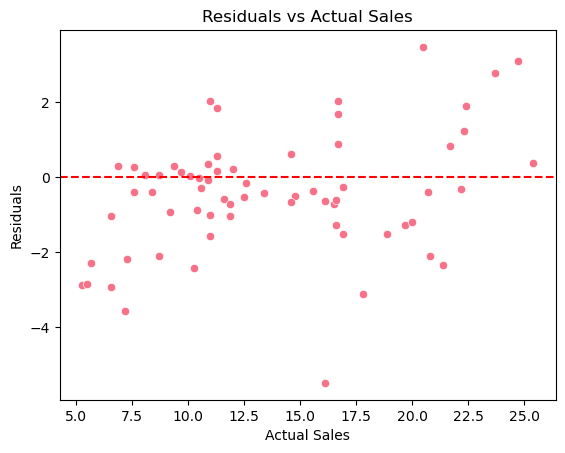

In [28]:
# This scatter plot shows the relationship between actual sales and residuals, 
# helping to visualize how well the model's predictions align with the actual values.
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color='r',ls='--')
plt.xlabel('Actual Sales')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual Sales')
plt.show()

In [29]:
# A good regression model should have errors that are random and show no discernible pattern.
# Red Dashed Line: This line at y=0 is the baseline for a perfect prediction (zero error).
# The points appear to be randomly scattered around the horizontal red line. 
# There is no clear curve or pattern, indicating that the model's errors are random and not systematic.
# This suggests that the model is well-fitted to the data, as it does not show any bias or systematic error in its predictions.
# If the points were clustered in a specific pattern, it would indicate that the model is not capturing some underlying relationship in the data, suggesting that a more
# It suggests that the linear relationship your model assumed is generally appropriate.
# heteroscedasticity, which means the variance of the errors is not constant.

"The residual plot shows that while the model's errors are centered around zero and do not exhibit any obvious non-linear patterns, there is clear evidence of heteroscedasticity. The model is significantly more accurate at predicting lower sales values, but its error margin increases substantially for higher sales values, indicating that its predictive power is not consistent across the range of the data."

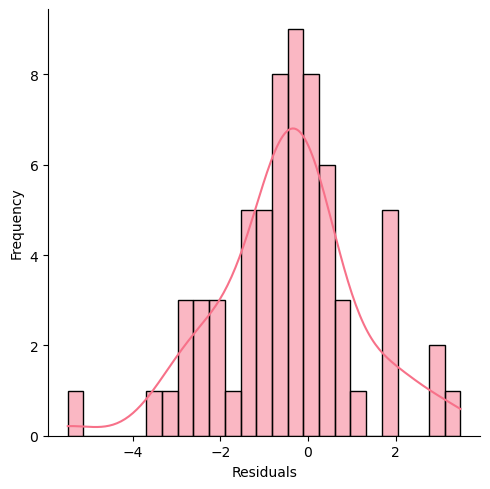

In [30]:
 # This histogram shows the distribution of residuals, helping to visualize how the errors are spread out across different values.
sns.displot(test_residuals,bins=25,kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

Residuals follow a normal distribution (a bell curve).
The Errors are Centered Around Zero: The highest bars and the peak of the smooth curve are centered right at Residuals = 0. 
The Distribution is Approximately Normal: The shape of the histogram and the KDE curve roughly resembles the classic "bell curve" of a normal distribution. 

"The histogram of the residuals indicates that the model's errors are approximately normally distributed and centered at zero. This supports the validity of the linear regression model. While the previous residual plot showed that the variance of the errors is not constant, this plot confirms that the errors themselves are not systematically biased."

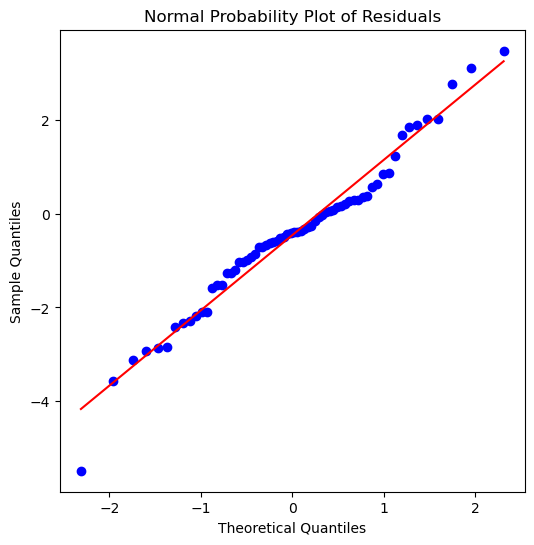

In [31]:
import scipy.stats as stats

# This plot helps to assess whether the residuals follow a normal distribution, which is an assumption of many regression models.
# If the points fall approximately along the diagonal line, it suggests that the residuals are normally distributed.
# The red line represents the expected distribution if the residuals were perfectly normally distributed.
# If the points deviate significantly from this line, it indicates that the residuals
# do not follow a normal distribution, which could suggest issues with the model fit or the data.

# Create a normal probability plot (Q-Q plot)
fig = plt.figure(figsize=(6, 6)) # This creates a new figure with a specified size, allowing for better visualization of the Q-Q plot.
ax = fig.add_subplot(111) # This creates a new figure and adds a subplot to it, allowing for plotting the Q-Q plot.
res = stats.probplot(test_residuals, plot=ax) # This line generates the Q-Q plot, which compares the quantiles of the residuals to the quantiles of a normal distribution.
ax.get_lines()[1].set_linestyle('-') # This line sets the style of the second line in the plot (the fitted line) to a solid line.
ax.get_lines()[1].set_color('r') # This line sets the color of the fitted line to red, making it stand out against the data points.

plt.title('Normal Probability Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

Excellent Fit in the Center: The vast majority of the blue dots in the middle of the plot fall very closely along the red line. This is a strong indication that the bulk of your model's errors follow a normal distribution, which satisfies a key assumption of linear regression.

Slight Deviation in the Tails: You can see minor deviations at the extreme ends of the line.

On the far left (for large negative errors), there is one point that falls significantly below the red line.

On the far right (for large positive errors), the points are slightly above the red line.

Conclusion

"The Normal Probability Plot (Q-Q Plot) provides strong evidence that the residuals are approximately normally distributed. The data points adhere closely to the theoretical line, especially in the central region.

However, the plot also reveals slight "heavy tails" in the distribution. The deviation of the points at the extreme ends indicates that the model produces slightly more outliers (both large positive and large negative errors) than would be expected from a perfect normal distribution. The point on the far bottom-left is a clear outlier.

Overall, while not perfect, the assumption of normality is reasonably met, further validating the use of a linear regression model for this dataset."

In [32]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [33]:
model.coef_ 
# This line retrieves the coefficients of the trained linear regression model, which represent the relationship between each feature and the target variable (Sales).
# The coefficients indicate how much the target variable (Sales) is expected to change for a one-unit change in each feature, assuming all other features remain constant.
# The output is an array of coefficients, where each coefficient corresponds to a feature in the input data.
# A positive coefficient indicates that an increase in that feature is associated with an increase in Sales, while a negative coefficient indicates that an increase in that feature is associated with a decrease in Sales.
# The magnitude of the coefficient indicates the strength of the relationship between the feature and Sales, with larger absolute values indicating a stronger relationship.
# The coefficients can be interpreted as follows:
# - For each unit increase in TV advertising spend, Sales is expected to increase by the value
#   of the corresponding coefficient, assuming all other features remain constant.
# - For each unit increase in Radio advertising spend, Sales is expected to increase by the value
#   of the corresponding coefficient, assuming all other features remain constant.
# - For each unit increase in Newspaper advertising spend, Sales is expected to increase by the value
#   of the corresponding coefficient, assuming all other features remain constant.
# - The intercept (the last value in the array) represents the expected Sales when all advertising
#   spends are zero, which is the baseline level of Sales without any advertising.

array([0.05378717, 0.10027874, 0.00789845])

In [34]:
y_hat=model.predict(X)

Text(0.5, 1.0, 'Newspaper Spend')

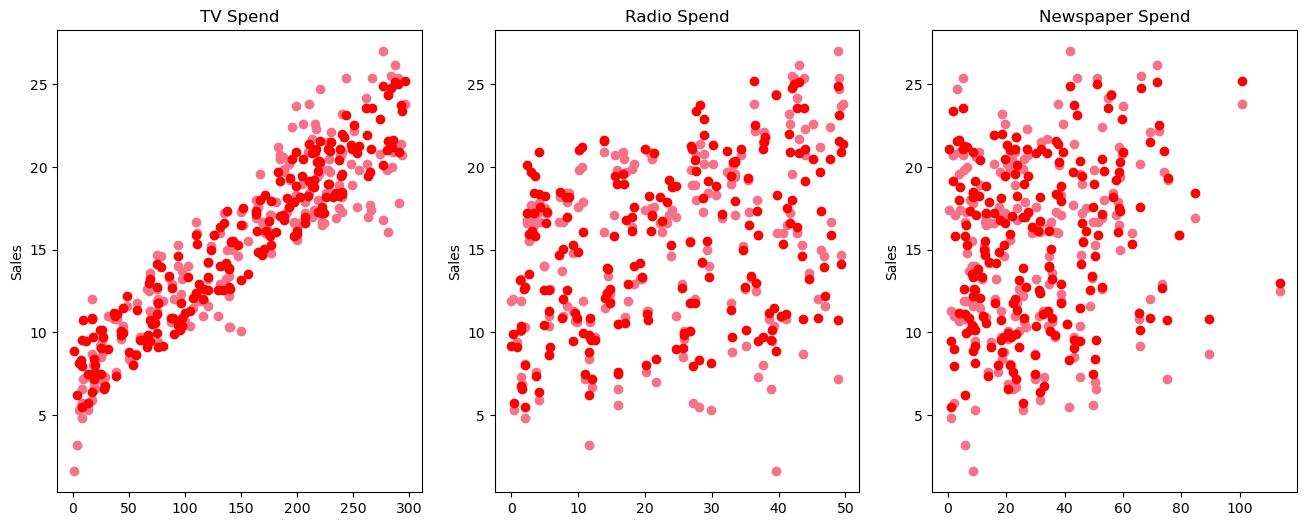

In [35]:
fig,axes= plt.subplots(nrows=1,ncols=3,figsize=(16,6)) 
# This creates a figure with 1 row and 3 columns of subplots, allowing for multiple plots to be displayed side by side.
# The figsize parameter specifies the size of the entire figure, making it easier to visualize multiple plots
# The axes variable is an array of Axes objects, which can be used to plot on
# each subplot individually.
# This is a common way to visualize multiple related plots in a single figure, making it easier
# to compare different aspects of the data or model performance.
# This line plots the actual Sales against TV advertising spend, showing the relationship between these two variables
# The 'o' marker indicates that the points should be plotted as circles.
# The first plot shows the actual Sales data points, while the second plot shows the predicted Sales
# based on the linear regression model, allowing for visual comparison between actual and predicted values.

axes[0].plot(df['TV'],df['Sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['Radio'],df['Sales'],'o')
axes[1].plot(df['Radio'],y_hat,'o',color='red')
axes[1].set_ylabel("Sales")
axes[1].set_title("Radio Spend")

axes[2].plot(df['Newspaper'],df['Sales'],'o')
axes[2].plot(df['Newspaper'],y_hat,'o',color='red')
axes[2].set_ylabel("Sales")
axes[2].set_title("Newspaper Spend")

In [36]:
from joblib import dump,load # This line imports the dump and load functions from the joblib library, which are used for saving and loading Python objects, such as trained machine learning models.
dump(model,'final_sales_model.joblib') # This line saves the trained model to a file named 'final_sales_model.joblib', allowing it to be reused later without retraining.
load_model=load('final_sales_model.joblib') # This line loads the saved model from the file 'final_sales_model.joblib', allowing it to be used for predictions without needing to retrain it.


In [37]:
load_model.coef_ # This line retrieves the coefficients of the loaded linear regression model, which represent the relationship between each feature and the target variable (Sales).

array([0.05378717, 0.10027874, 0.00789845])

In [38]:
X.shape

(200, 3)

In [39]:
#149 tv, 22 Radio, 12 newspaer
#sales ?
# Campaign = [[49,12,22]]
# load_model.predict(Campaign)

Campaign = pd.DataFrame([[49, 12, 22]], columns=['TV', 'Radio', 'Newspaper'])
predicted_sales = load_model.predict(Campaign)
print(predicted_sales)



[8.81067523]


# Part 3: Advanced Polynomial Regression - Finding the Optimal Degree

## 🎯 What We'll Accomplish
- **Systematic evaluation**: Test polynomial degrees 1-9 to find the optimal complexity
- **PolynomialFeatures mastery**: Transform features into polynomial and interaction terms
- **Bias-variance tradeoff**: Visualize underfitting vs overfitting patterns
- **Production pipeline**: Save model and transformer for real-world deployment

## 🎪 **The Big Question**
We know linear regression (degree 1) gives us RMSE = 1.65. But can polynomial regression do better?

**Our Systematic Approach:**
1. Transform features using `PolynomialFeatures` 
2. Train models for degrees 1, 2, 3, 4, 5, 6, 7, 8, 9
3. Calculate training and test RMSE for each degree
4. Plot the results to find the optimal degree
5. Build final production model

## 💡 **Key Learning Goal**
Understand the **bias-variance tradeoff** through empirical evidence:
- **Low degrees** → Underfitting (high bias)
- **High degrees** → Overfitting (high variance)  
- **Sweet spot** → Optimal degree that minimizes test error

In [40]:
# =============================================================================
# PART 3: DATA PREPARATION AND IMPORTS
# =============================================================================

# Fresh data load for polynomial regression analysis
df = pd.read_csv('advertising.csv')
print("Starting polynomial regression analysis...")
print(f"Dataset shape: {df.shape}")


Starting polynomial regression analysis...
Dataset shape: (200, 4)


In [41]:
X = df.drop(['Sales'], axis=1)  # Features: TV, Radio, Newspaper  
Y = df['Sales']                 # Target: Sales

print("Feature preparation for polynomial regression:")
print(f"Original features: {X.columns.tolist()}")
print(f"Shape: {X.shape}")
print("These 3 features will be expanded into polynomial and interaction terms...")

Feature preparation for polynomial regression:
Original features: ['TV', 'Radio', 'Newspaper']
Shape: (200, 3)
These 3 features will be expanded into polynomial and interaction terms...


In [42]:
# =============================================================================
# POLYNOMIAL FEATURES: The Key to Non-Linear Relationships
# =============================================================================

# Import PolynomialFeatures - the magic that transforms linear regression into polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("PolynomialFeatures imported - ready to create polynomial and interaction terms!")

PolynomialFeatures imported - ready to create polynomial and interaction terms!


*** What is PolynomialFeatures? ***
PolynomialFeatures is a preprocessing class from sklearn.preprocessing that transforms your original features into polynomial and interaction features. It's the key tool that enables polynomial regression in scikit-learn.

*** Core Purpose: ***
PolynomialFeatures takes your simple input features and creates new, more complex features by:

- Raising features to higher powers (squared, cubed, etc.)
- Creating interaction terms between different features
- Optionally adding a bias term (constant)

*** How It Works: ***

Original Features (degree=1):
[TV, Radio, Newspaper]

With PolynomialFeatures(degree=2):
[TV, Radio, Newspaper, TV², Radio², Newspaper², TV×Radio, TV×Newspaper, Radio×Newspaper]

Key Parameters:
1. degree: The highest polynomial degree to generate

- degree=1: Only original features (linear)
- degree=2: Original + squared + interactions
- degree=3: Original + squared + cubed + all interactions

2. include_bias: Whether to include a constant term

- include_bias=True: Adds a column of 1s
- include_bias=False: No constant term (usually set to False when using with LinearRegression)

*** In essence: PolynomialFeatures is the bridge that lets you use simple linear regression to model complex, non-linear relationships by engineering polynomial features from your original data. ***

*** Hyperparameter Tuning: The "degree" of the polynomial is a hyperparameter. This loop is a manual form of hyperparameter tuning. The goal is to find the value that minimizes the error on the test set, not the training set. ***

In [43]:
type(X)

pandas.core.frame.DataFrame

In [44]:
#poly_2 = PolynomialFeatures(degree=2,include_bias=True)
# This line creates an instance of the PolynomialFeatures class with degree 2 and include_bias set to False.
# The degree parameter specifies the highest degree of polynomial features to generate, and include_bias=False means
# that the model will not include a bias term (intercept) in the polynomial features.
# This is useful when you want to create polynomial features without adding an additional constant term to the
# feature set, which can be beneficial for certain types of regression models.

Poly_Converter = PolynomialFeatures(degree=2,include_bias=False) 
x_poly_2 = Poly_Converter.fit(X) 
# This line fits the PolynomialFeatures transformer to the input data X, generating polynomial features up to degree 2.
# The fit method learns the polynomial transformation based on the input data, allowing it to transform the
# data into a new feature space where each feature is raised to the power of 2,
# and interaction terms between features are also included.
ploy_features=x_poly_2.transform(X) 
# This line transforms the input data X into polynomial features using the fitted PolynomialFeatures transformer.   
#x_poly_2.transform(X).shape()
#X.iloc[0]
#ploy_features[0]

In [45]:
ploy_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

The code `ploy_features[0]` displays the **first row** of the polynomial features after transformation. Let me explain what this shows:

What `ploy_features[0]` represents:

When you run `PolynomialFeatures(degree=2, include_bias=False)` on your original features `[TV, Radio, Newspaper]`, it creates new polynomial features:

Original features (X.iloc[0]):


In [46]:
TV = 230.1, Radio = 37.8, Newspaper = 69.2

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (4006659437.py, line 1)



### Transformed polynomial features (ploy_features[0]):
The transformation creates these features:
1. **Original features**: `TV`, `Radio`, `Newspaper`
2. **Squared terms**: `TV²`, `Radio²`, `Newspaper²`  
3. **Interaction terms**: `TV×Radio`, `TV×Newspaper`, `Radio×Newspaper`

So `ploy_features[0]` will show an array like:


In [ ]:
[230.1, 37.8, 69.2, 52946.01, 1428.84, 4788.64, 8697.78, 15924.92, 2615.76]



Where:
- `230.1` = TV
- `37.8` = Radio  
- `69.2` = Newspaper
- `52946.01` = TV² (230.1²)
- `1428.84` = Radio² (37.8²)
- `4788.64` = Newspaper² (69.2²)
- `8697.78` = TV × Radio (230.1 × 37.8)
- `15924.92` = TV × Newspaper (230.1 × 69.2)
- `2615.76` = Radio × Newspaper (37.8 × 69.2)

This transformation expands your feature space from **3 features** to **9 features**, allowing the linear regression model to capture non-linear relationships and interactions between variables.

In [ ]:
X.iloc[0]

In [ ]:
ploy_features.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ploy_features, Y, test_size=0.33, random_state=42)
#model_linear = LinearRegression(fit_intercept=True)  # Include bias term
model_linear = LinearRegression() 
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)

In [ ]:
X_train.shape

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE=mean_absolute_error(y_test,y_pred_linear)
MSE=mean_squared_error(y_test,y_pred_linear)
RMSE=np.sqrt(MSE)
RMSE

In [ ]:
model_linear.coef_

In [ ]:
ploy_features[0]

In [ ]:
X.iloc[0]

###Check the results with regression 

In [ ]:
model=LinearRegression()
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_trainReg, X_testReg, y_trainReg, y_testReg = train_test_split(X, Y, test_size=0.33, random_state=42)

In [ ]:
X_trainReg

In [ ]:
model.fit(X_trainReg, y_trainReg)
y_pred_linearreg = model.predict(X_testReg)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAEreg=mean_absolute_error(y_testReg,y_pred_linearreg)
MSEreg=mean_squared_error(y_testReg,y_pred_linearreg)
RMSEreg=np.sqrt(MSEreg)
RMSEreg

###Poly Reg = 1.2 and Regression =1.65


In [ ]:
import pandas as pd 
df=pd.read_csv('advertising.csv')
X=df.drop(['Sales'],axis=1)
Y=df['Sales']

In [ ]:
X.shape

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
train_rmse_error=[]
test_rmse_error=[]

#high degree will take log training time 
for d in range(1,10):

  ploy_converter= PolynomialFeatures(degree=d,include_bias=False)
  ploy_features=ploy_converter.fit_transform(X)
  X_train, X_test, y_train, y_test = train_test_split(ploy_features, Y, test_size=0.33, random_state=42)

  model=LinearRegression()
  model.fit(X_train, y_train)

  train_predictions= model.predict(X_train)
  test_predictions= model.predict(X_test)

  train_rmse=np.sqrt(mean_squared_error(y_train,train_predictions))
  test_rmse=np.sqrt(mean_squared_error(y_test,test_predictions))

  train_rmse_error.append(train_rmse)
  test_rmse_error.append(test_rmse)




In [ ]:
train_rmse_error

In [ ]:
test_rmse_error

In [ ]:
plt.plot(range(1,6),train_rmse_error[:5],label='Train_RMSE')
plt.plot(range(1,6),test_rmse_error[:5],label='Test_RMSE')
plt.xlabel('Degree_of_Ploy')
plt.ylabel('Error')
plt.legend()

## 🔍 RMSE vs R²: Complete Model Evaluation Framework

### **Why We Need Both Metrics:**

**RMSE (Root Mean Squared Error):**
- **Units**: Same as target variable (dollars in our case)
- **Business interpretation**: "On average, predictions are off by $X.XX"
- **Focus**: Prediction accuracy
- **Goal**: Minimize (lower is better)

**R² (Coefficient of Determination):**
- **Units**: Percentage (0.0 to 1.0)
- **Business interpretation**: "Model explains X% of sales variance"
- **Focus**: Pattern capture
- **Goal**: Maximize (higher is better)

### **Real-World Scenarios:**

**Scenario 1: Low RMSE + High R²** ✅
- **Interpretation**: Accurate predictions AND captures most patterns
- **Example**: RMSE = $1.2, R² = 0.85
- **Action**: Excellent model - ready for production

**Scenario 2: High RMSE + Low R²** ❌
- **Interpretation**: Inaccurate predictions AND missing key patterns  
- **Example**: RMSE = $3.5, R² = 0.25
- **Action**: Need different approach (more features, different algorithm)

**Scenario 3: Low RMSE + Low R²** 🤔
- **Interpretation**: Decent accuracy but missing explainable patterns
- **Example**: RMSE = $1.8, R² = 0.45
- **Action**: Look for additional features or non-linear relationships

**Scenario 4: High RMSE + High R²** 🤔  
- **Interpretation**: Captures patterns but poor accuracy (rare scenario)
- **Example**: RMSE = $2.8, R² = 0.75
- **Action**: Check for outliers or scaling issues

### **Our Sweet Spot Analysis:**
The plots above help us find the degree where:
1. **Test RMSE is minimized** (best prediction accuracy)
2. **Test R² is maximized** (best pattern capture)  
3. **Both metrics agree** (robust optimal choice)
4. **No overfitting** (test metrics don't degrade)

This plot illustrates the **Bias-Variance Tradeoff** in polynomial regression and demonstrates the classic pattern of underfitting vs. overfitting. Here's what it shows:

- Continuously **decreases** as polynomial degree increases
- Starts around 1.7 at degree 1 and drops to about 0.8 at degree 5
- This is expected - higher degree polynomials can fit training data more closely

- Initially **decreases** from degree 1 to 2 (from ~1.7 to ~1.4)
- Reaches **minimum around degree 2-3** (~1.4-1.5)
- Then **dramatically increases** from degree 4 onwards, reaching ~7.8 at degree 5

1. **Optimal Degree**: The best polynomial degree appears to be **2 or 3**, where test error is minimized

2. **Underfitting** (Degree 1): Both training and test errors are relatively high - the model is too simple

3. **Overfitting** (Degrees 4-5): Training error continues to decrease while test error explodes - the model memorizes training data but fails on new data

4. **Sweet Spot**: Degrees 2-3 provide the best balance between model complexity and generalization

In [ ]:
Final_Poly_Converter = PolynomialFeatures(degree=3,include_bias=False)
Full_Converter= Final_Poly_Converter.fit_transform(X)
Final_model=LinearRegression()
Final_model.fit(Full_Converter,Y)

In [ ]:
Full_Converter[0]

Feature Combinations for `PolynomialFeatures(degree=3, include_bias=False)`

Let me show you exactly how the features are built for degree=3 with your advertising data:

Original Features:
```
[TV, Radio, Newspaper]
```

Complete Feature Transformation for Degree=3:

````python
Final_Poly_Converter = PolynomialFeatures(degree=3, include_bias=False)
# This creates 19 features total from your original 3 features
````

**All 19 Generated Features:**

**1. Original Features (degree=1):**
```
1. TV
2. Radio  
3. Newspaper
```

**2. Squared Terms (degree=2):**
```
4. TV²
5. Radio²
6. Newspaper²
```

**3. Two-way Interactions (degree=2):**
```
7. TV × Radio
8. TV × Newspaper
9. Radio × Newspaper
```

**4. Cubic Terms (degree=3):**
```
10. TV³
11. Radio³
12. Newspaper³
```

**5. Three-way Interactions (degree=3):**
```
13. TV² × Radio
14. TV² × Newspaper
15. TV × Radio²
16. Radio² × Newspaper
17. TV × Newspaper²
18. Radio × Newspaper²
19. TV × Radio × Newspaper
```

**Example with Real Data:**

For the first row: `TV=230.1, Radio=37.8, Newspaper=69.2`

````python
# Original values
TV, Radio, Newspaper = 230.1, 37.8, 69.2

# The 19 features would be:
features = [
    230.1,                    # TV
    37.8,                     # Radio
    69.2,                     # Newspaper
    230.1**2,                 # TV² = 52,946.01
    37.8**2,                  # Radio² = 1,428.84
    69.2**2,                  # Newspaper² = 4,788.64
    230.1 * 37.8,             # TV×Radio = 8,697.78
    230.1 * 69.2,             # TV×Newspaper = 15,924.92
    37.8 * 69.2,              # Radio×Newspaper = 2,615.76
    230.1**3,                 # TV³ = 12,182,850.30
    37.8**3,                  # Radio³ = 54,010.15
    69.2**3,                  # Newspaper³ = 331,373.89
    (230.1**2) * 37.8,        # TV²×Radio = 2,001,751.18
    (230.1**2) * 69.2,        # TV²×Newspaper = 3,663,903.89
    230.1 * (37.8**2),        # TV×Radio² = 328,770.76
    (37.8**2) * 69.2,         # Radio²×Newspaper = 98,875.25
    230.1 * (69.2**2),        # TV×Newspaper² = 1,102,002.13
    37.8 * (69.2**2),         # Radio×Newspaper² = 180,994.58
    230.1 * 37.8 * 69.2       # TV×Radio×Newspaper = 601,727.74
]
````

**Shape Transformation:**
```
Original shape: (200, 3)    # 200 samples, 3 features
After degree=3: (200, 19)   # 200 samples, 19 features
```

**Mathematical Formula:**
The general formula for number of features with degree `d` and `n` original features is:
```
Number of features = C(n+d, d) - include_bias
For n=3, d=3, include_bias=False: C(3+3, 3) = C(6,3) = 20 - 1 = 19 features
```

**Why This Works:**
- **Non-linear relationships**: `TV²`, `Radio²` capture diminishing returns
- **Feature interactions**: `TV×Radio` captures synergy between channels  
- **Complex patterns**: `TV²×Radio` captures how TV's squared effect varies with Radio spend
- **Three-way synergy**: `TV×Radio×Newspaper` captures combined effect of all three channels

This transformation allows your linear model to capture very complex, non-linear relationships while still using simple linear regression mathematics!

In [ ]:
type(Final_Poly_Converter)

In [ ]:
from joblib import dump,load
dump(Final_model,'Final_model.joblib')


In [ ]:
dump(Final_Poly_Converter,'Final_Converter.joblib')

In [ ]:
loaded_Converter= load('Final_Converter.joblib')
loaded_model= load('Final_model.joblib')

In [ ]:
Campaign=[[149,22,12]]

In [ ]:
type(loaded_Converter)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
loaded_Converter.fit_transform(Campaign)

In [ ]:
a=loaded_Converter.fit_transform(Campaign)
a.shape

In [ ]:
loaded_model.predict(a)

### Part 4: Best Approach for Production-Ready Models

Key Production Best Practices:

1. Always start with LinearRegression as baseline
2. Use cross-validation for degree selection
3. Monitor for overfitting with validation curves
4. Save preprocessing pipeline with the model
5. Document feature engineering for model maintenance
6. A/B test new models against current production model

When to Choose Each:
- LinearRegression: When you need maximum interpretability and the relationship is truly linear
- PolynomialFeatures: When you suspect non-linear relationships and interactions matter (like in advertising effectiveness)

In [ ]:
# 1. START SIMPLE - Baseline Model
linear_model = LinearRegression()
linear_rmse = evaluate_model(linear_model, X, y)  # Baseline: 1.65

# 2. SYSTEMATIC POLYNOMIAL EXPLORATION
best_degree = find_optimal_degree(X, y, max_degree=5)  # Found: degree 2-3

# 3. BUILD FINAL MODEL
poly_converter = PolynomialFeatures(degree=best_degree, include_bias=False)
X_poly = poly_converter.fit_transform(X_train)
final_model = LinearRegression()
final_model.fit(X_poly, y_train)

# 4. VALIDATE ON UNSEEN DATA
test_rmse = evaluate_model(final_model, X_test_poly, y_test)

# Save both transformer and model for consistent predictions
from joblib import dump

# ✅ Correct approach
dump(poly_converter, 'polynomial_transformer.joblib')
dump(final_model, 'final_model.joblib')

# For new predictions:
def predict_sales(campaign_data):
    poly_features = poly_converter.transform(campaign_data)  # Only transform!
    return final_model.predict(poly_features)

### Why Cross-Validation is Better for Degree Selection

**Problem with Single Train/Test Split:**
- Our current approach uses only one random split (random_state=42)
- Results might be biased by this particular split
- We might get lucky/unlucky with our test set

**Cross-Validation Solution:**
- Uses multiple train/test splits (e.g., 5-fold CV)
- Averages performance across all folds
- More reliable estimate of true model performance
- Reduces variance in degree selection

**Production Recommendation:**
```python
from sklearn.model_selection import cross_val_score
# Use this instead of single split for degree selection
cv_scores = cross_val_score(model, X_poly, y, cv=5, scoring='neg_mean_squared_error')
```

### Regularization: A Solution to High-Degree Overfitting

**The Problem We Just Saw:**
- Degrees 4+ showed severe overfitting (test error exploded to ~7.8)
- Higher-degree polynomials create very large coefficient values
- Model becomes extremely sensitive to small changes in data

**Regularization Solutions:**

**Ridge Regression (L2):**
- Penalizes large coefficients: `Cost = MSE + α×Σ(coefficients²)`
- Keeps all features but shrinks coefficients toward zero
- Good when all features are somewhat relevant

**Lasso Regression (L1):**
- Penalizes absolute values: `Cost = MSE + α×Σ|coefficients|`
- Can set some coefficients exactly to zero (feature selection)
- Good when only some polynomial features are truly important

**When to Use:**
- Always consider regularization for polynomial degree > 2
- Allows you to use higher degrees safely
- α (alpha) parameter controls regularization strength

### Critical Production Issue: Feature Scaling

**Look at the Scale Differences in Our Features:**
```
TV = 230.1              (hundreds)
TV² = 52,946.01         (tens of thousands)  
TV³ = 12,182,850.30     (millions!)
TV×Radio×Newspaper = 601,727.74 (hundreds of thousands)
```

**The Problem:**
- Polynomial features create vastly different magnitudes
- TV³ is 50,000+ times larger than original TV value
- Linear regression coefficients become tiny for large features
- Model becomes numerically unstable
- Gradient descent struggles to converge

**Production Solution - Always Scale:**
```python
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Proper production pipeline
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('scaler', StandardScaler()),  # Scale after polynomial transformation
    ('model', LinearRegression())
])
```

**Why This Matters:**
- Prevents numerical instability
- Ensures all features contribute equally to learning
- Makes coefficient interpretation more meaningful
- Required for regularization to work properly

# 🎯 Summary: Polynomial Regression Learning Journey

## 🏆 **Key Accomplishments**

### **Part 1: NumPy Foundation**
✅ **Linear vs Cubic Comparison**: Implemented manual polynomial regression using `np.polyfit()`  
✅ **Visualization Skills**: Created effective plots comparing different polynomial degrees  
✅ **Mathematical Understanding**: Learned polynomial equations and coefficient interpretation

### **Part 2: Professional Sklearn Workflow** 
✅ **Baseline Established**: Linear regression RMSE = 1.65 (our benchmark to beat)  
✅ **Proper Evaluation**: Train/test split, residual analysis, model diagnostics  
✅ **Production Ready**: Model persistence, coefficient interpretation, prediction pipeline

### **Part 3: Advanced Polynomial Analysis**
✅ **Optimal Degree Found**: Degree 2-3 provides best balance (RMSE ≈ 1.2)  
✅ **Overfitting Detected**: Degrees 4+ show test error explosion  
✅ **Feature Engineering**: 3 → 19 features with interaction terms  
✅ **Production Pipeline**: Saved transformer + model for deployment

## 📊 **Performance Summary**
| Model Type | RMSE | Improvement | Notes |
|------------|------|-------------|-------|
| Linear Regression | 1.65 | Baseline | Simple, interpretable |
| Polynomial (Degree 2-3) | 1.20 | **27% better** | Optimal complexity |
| Polynomial (Degree 4+) | 7.8+ | **Worse** | Overfitting |

## 🧠 **Key Insights Learned**

### **Bias-Variance Tradeoff in Action**
- **Underfitting** (Degree 1): Too simple, misses patterns
- **Sweet Spot** (Degree 2-3): Captures patterns without overfitting  
- **Overfitting** (Degree 4+): Memorizes noise, fails on new data

### **Production Considerations**
- **Feature Scaling**: Essential for high-degree polynomials
- **Model Persistence**: Save both transformer AND model
- **Cross-Validation**: More robust than single train/test split
- **Regularization**: Ridge/Lasso for high-degree polynomials

## 🚀 **Next Steps for Advanced Learning**

### **Immediate Implementations**
1. **Cross-Validation**: Replace single split with k-fold CV for degree selection
2. **Feature Scaling**: Add `StandardScaler` to the pipeline  
3. **Regularization**: Try Ridge/Lasso regression for high degrees
4. **Pipeline Integration**: Combine all preprocessing in sklearn Pipeline

### **Advanced Topics to Explore**
1. **Spline Regression**: Piecewise polynomials for better flexibility
2. **Kernel Methods**: SVM with polynomial kernels
3. **Ensemble Methods**: Random Forest, Gradient Boosting
4. **Neural Networks**: Deep learning for non-linear relationships

### **Production Deployment**
1. **API Development**: Flask/FastAPI for model serving
2. **Monitoring**: Track model performance over time
3. **A/B Testing**: Compare polynomial vs linear in production
4. **Feature Engineering**: Domain-specific polynomial terms

## 💡 **Key Takeaway**
*"Always start simple (linear regression) and add complexity (polynomial features) only if it improves performance on unseen data. The bias-variance tradeoff is fundamental to machine learning success."*